In [2]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/home/gathu/.kaggle’: File exists


In [4]:
! cp /home/gathu/Documents/work/infobyte/kaggle.json  /home/gathu/.kaggle

In [6]:
!cd /home/gathu/.kaggle && ls

kaggle.json


In [15]:
import kaggle


In [22]:
kaggle.api.authenticate()
kaggle.api.dataset_download_files("saurabh00007/iriscsv",path='.',unzip=True)

Dataset URL: https://www.kaggle.com/datasets/saurabh00007/iriscsv


In [24]:
!ls

iriscsv.zip  kaggle.json  Untitled.ipynb


In [25]:
!unzip iriscsv.zip -d data/

Archive:  iriscsv.zip
  inflating: data/Iris.csv           


In [28]:
!cd data && ls

Iris.csv


In [32]:
import pandas as pd 
data= pd.read_csv("data/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
x,y=data.iloc[:,2:5],data.iloc[:,-1]


In [55]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
y=label_encoder.fit_transform(y)


In [56]:
from sklearn.model_selection import *
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)



Encode

Model Building

Decision Trees

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



K Nearest Neighbour

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)
y_pred_knn=knn_model.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Logistic regression

In [81]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression(multi_class='multinomial',solver='lbfgs')
log_model.fit(x_train,y_train)
log_predict=log_model.predict(x_test)

accuracy=log_model.score(x_test,y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

display(confusion_matrix(y_test,log_predict))


Accuracy: 100.00%


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

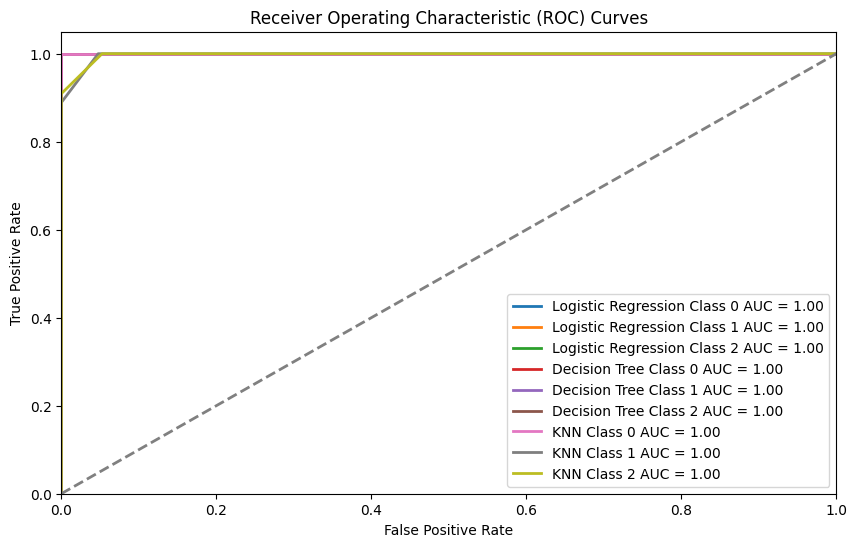

In [78]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Assuming y_test is a 1D array of class labels (0, 1, 2)
# Binarize the output
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]

# Initialize a figure for the ROC curves
plt.figure(figsize=(10, 6))

# Logistic Regression
y_pred_proba_log = log_model.predict_proba(x_test)
for i in range(n_classes):
    fpr_log, tpr_log, _ = roc_curve(y_test_binarized[:, i], y_pred_proba_log[:, i])
    roc_auc_log = auc(fpr_log, tpr_log)
    plt.plot(fpr_log, tpr_log, lw=2, label='Logistic Regression Class {} AUC = {:.2f}'.format(i, roc_auc_log))

# Decision Tree
y_pred_proba_dt = model.predict_proba(x_test)
for i in range(n_classes):
    fpr_dt, tpr_dt, _ = roc_curve(y_test_binarized[:, i], y_pred_proba_dt[:, i])
    roc_auc_dt = auc(fpr_dt, tpr_dt)
    plt.plot(fpr_dt, tpr_dt, lw=2, label='Decision Tree Class {} AUC = {:.2f}'.format(i, roc_auc_dt))

# K-Nearest Neighbors
y_pred_proba_knn = knn_model.predict_proba(x_test)
for i in range(n_classes):
    fpr_knn, tpr_knn, _ = roc_curve(y_test_binarized[:, i], y_pred_proba_knn[:, i])
    roc_auc_knn = auc(fpr_knn, tpr_knn)
    plt.plot(fpr_knn, tpr_knn, lw=2, label='KNN Class {} AUC = {:.2f}'.format(i, roc_auc_knn))

# Plot diagonal line (no skill)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)

# Labels and Title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()
